# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
    Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

## <center> Exercício: Regressão linear </center>

Instruções
----------

Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* `plotarDados()`
* `gradienteDescente()`
* `computarCusto()`

Você não poderá criar nenhuma outra função, nem importar novas bibliotecas. Apenas altere as rotinas fornecidas.

## Introdução

Neste exercício, você irá implementar o método de regressão linear com uma variável para prever o resultado orçamentário mensal de uma cidade. 

Suponha que Governo Federal deseja estimar o valor (em reais) que sobrará no final de cada mês no caixa de uma prefeitura levando-se em conta o número de habitantes residentes da cidade. Para isso, funcionários do governo coletaram vários resultados médios obtidos para diversas cidades e armazenaram na base de dados.

Você foi contratado para desenvolver um método que ofereça uma boa previsão do resultado orçamentário mensal de uma cidade qualquer baseado apenas no tamanho da sua população (número de habitantes).

O arquivo `dados.txt` contém o conjunto de dados que deverá ser utilizado para o problema da regressão linear. A primeira coluna contém o tamanho da população da cidade (x 10.000 habitantes) e a segunda coluna corresponde ao resultado orçamentário mensal médio da cidade (x R\$ 100.000,00). Um valor orçamentário negativo indica que os recursos provenientes pelo Governo Federal foram insuficientes para cobrir todos os gastos.

## Parte 1: Plotando os dados

Nessa etapa você irá completar uma função para plotar os dados.

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "dados"

import numpy as np #importa a biblioteca usada para trabalhar com vetores de matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os #importa a biblioteca para tarefas relacionadas ao sistema operacional

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( os.path.join(FILES_DIRECTORY, 'dados.txt'), sep=',') 

Vamos dar uma olhada nas 6 primeiras amostras da base de dados.

In [2]:
# vamos usar a função display para imprimir o dataframe, pois deixa mais bonito. 
# também poderíamos ter usado a função print: print(df_dataset.head(n=6))
display(df_dataset.head(n=6))

,tamanho_populacao,orcamento
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860


Vamos guardar os valores do tamanho da população da cidade  dentro de um vetor X e as classes dentro de um vetor Y.

In [3]:
# pega os valores das n-1 primeiras colunas e guarda em um vetor X
X = df_dataset['tamanho_populacao'].values 

# pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset['orcamento'].values 

# imprime as 5 primeiras linhas da matriz X
print('Primeiros valores de X:', X[0:5])

# imprime os 5 primeiros valores de Y
print('Primeiros valores de Y:', Y[0:5])

Primeiros valores de X: [6.1101 5.5277 8.5186 7.0032 5.8598]
Primeiros valores de Y: [17.592   9.1302 13.662  11.854   6.8233]


Agora, vamos criar uma função para plotar os dados usando um gráfico de dispersão.

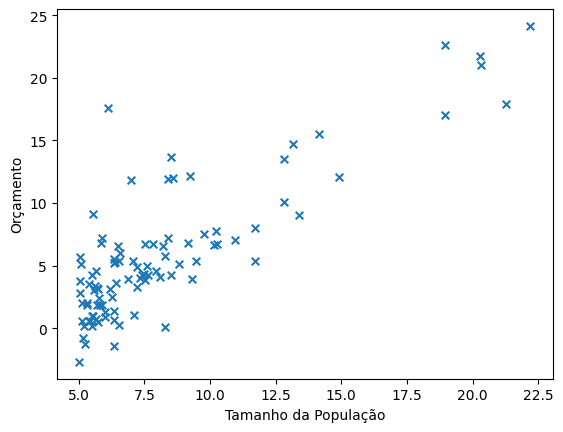

In [6]:
#criando a função para plotar os dados
def plotarDados(X,Y):
    """
    Plota pontos de dados e seta os rotulos x e y da
    figura com "Populacao" e "Orcamento", respectivamente.
    """
        
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Plote os dados de treinamento em um grafico usando o comando 
    #            "plt.scatter". Sete o rotulo dos eixos usando os comandos
    #            "plt.xlabel" e "plt.ylabel". Assuma que a populacao e o resultado 
    #            orcamentario sao passados nas variaveis X e Y, como 
    #            argumentos desta funcao.
    # 
    # Dica: Voce pode usar a opcao "marker='x'" do comando plt.scatter para obter simbolos que
    #       parecem xis. Alem disso, voce pode aumentar o tamanhos dos simbolos
    #       usando o parâmetro "s=30" da função plt.scatter, troque "30" por qualquer valor desejado.

    plt.scatter(X, Y, marker='x', s=20)
    plt.xlabel('Tamanho da População')
    plt.ylabel('Orçamento')
    
    ##########################################################################


#chamando a função que plota os dados   
plotarDados(X,Y)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

## Parte 2: Gradiente descendente

Nessa etapa, será calculado o gradiente descendente. 

Primeiro, devem ser inicializadas algumas variáveis importantes, como mostrado abaixo.

In [7]:
m = len(X) # número de amostras

X = np.column_stack( (np.ones(m),X) ) # Adicionar uma coluna de 1s em x
theta = np.zeros(2) # Inicializa parâmetros que serao ajustados

# Parametros do gradiente descente
iteracoes = 1500
alpha = 0.01

Na regressão linear, o custo de usar $\Theta$ como parametro para ajustar os dados, pode ser definido da seguinte forma:


$$ J(\Theta_0, \Theta_1, ..., \Theta_n) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\Theta\left(x^{(i)}\right)-y^{(i)} \right)^2 $$ e 

$$ h_\Theta(x) = \Theta_0 + \Theta_1 x_1 + \Theta_2 x_2, + ...., + \Theta_n x_n $$ 

Na função abaixo, você deverá completar a função que será usada para calcular o custo.

In [27]:
def computarCusto(X, Y, theta):
    """
    Calcula o custo de usar theta como parametro 
    da regressao linear para ajustar os dados de X e y    
    """
    
    # Initializa algumas variaveis uteis
    m = len(Y) #numero de exemplos de treinamento

    # Voce precisa retornar a seguinte variavel corretamente
    J = 0

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Calcule o custo de uma escolha particular de theta.
    # Voce precisa armazenar o valor do custo em J.

    h_theta = np.dot(X, theta)
    
    J = np.sum(np.square(h_theta - Y))
    J *= (1 / (2 * m))

    ##########################################################################
    
    return J
    
J = computarCusto(X, Y, theta)
print('Custo inicial: %f' %J)

Custo inicial: 32.072734


Se a sua função estiver correta, o custo inicial exibido deverá ser aproximadamente igual a **32.07**.

Agora, você precisa completar a função que irá usar o gradiente descendente para otimizar os parâmetros da regressão linear ($\theta$). Em cada passo do gradiente, o valor de ($\theta$) é atualizado pela equação:

$$\theta_j := \theta_j  - \alpha \frac{\partial}{\partial \theta_j} J(\Theta_0, \Theta_1, ..., \Theta_n) \text{,}$$ onde

$$ \frac{\partial}{\partial \theta_j} J(\Theta_0, \Theta_1, ..., \Theta_n)=\left\{
  \begin{array}{@{}ll@{}}
    \frac{1}{m} \sum_{i=1}^{m} \left( h_\Theta\left(x^{(i)}\right)-y^{(i)} \right), & \text{se}\ j=0 \\
    \frac{1}{m} \sum_{i=1}^{m} \left( h_\Theta\left(x^{(i)}\right)-y^{(i)} \right) x^{(i)}, & \text{se}\ j>0
  \end{array}\right.
$$

In [28]:
def gradienteDescente(X, Y, theta, alpha, num_iter):
    """
    Executa o gradiente descente para otimizar os parâmetros theta. 
    
    Atualiza theta usando num_iter passos do gradiente com taxa de aprendizado alpha.
    """

    # Initializa algumas variaveis uteis
    m = len(Y) # numero de exemplos de treinamento
    J_historico = np.zeros(num_iter) #vetor para armazenar o valor de J em cada iteracao do gradiente

    for it in range(num_iter):
    
        ########################## COMPLETE O CÓDIGO AQUI  ########################
        # Instrucoes: Execute um unico passo do gradiente para ajustar o vetor
        #             theta. 
        #
        # Dica: para verificar se a o gradiente esta correto, verifique se a 
        #       funcao de custo (computarCusto) nunca aumenta de valor no 
        #       decorrer das iteracoes.
        
        h_theta = np.dot(X, theta)
        theta -= (alpha * np.dot(X.T, h_theta - Y)) / m
        
        ##########################################################################   
        
        # Armazena o custo J obtido em cada iteracao do gradiente   
        J_historico[it] = computarCusto(X, Y, theta)
        
    return theta, J_historico


# chama o metodo do gradiente descente
theta = np.zeros(2) #Inicializa parâmetros que serao ajustados
theta, J_historico = gradienteDescente(X, Y, theta, alpha, iteracoes)

# imprime o valor de Theta
print('Theta encontrado pelo gradiente descendente: %f %f.\n' %(theta[0], theta[1]))

Theta encontrado pelo gradiente descendente: -3.630291 1.166362.



Se o gradiente descente estiver correto, os valores esperados são, aproximadamente: $\theta_0 = -3.630$ e $\theta_1 = 1.166$

A seguir, o regressor linear será plotado.

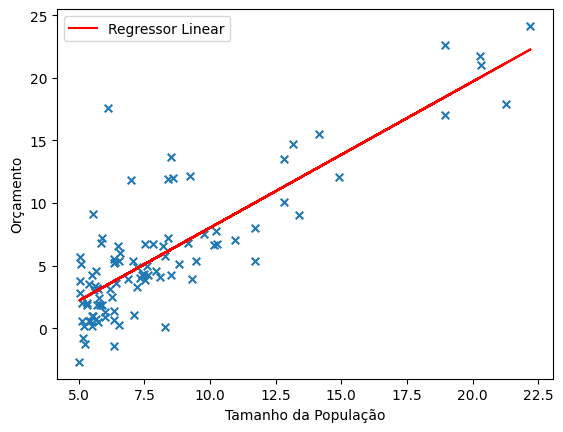

In [29]:
# plota os dados de treinamento
plotarDados(X[:,1],Y)

# plota os dados
plt.plot(X[:,1], np.dot(X,theta), label = 'Regressor Linear', color='red', linestyle='-', linewidth=1.5) 

# Plota a legenda
plt.legend()

plt.show()

Abaixo, o gráfico de convergência do gradiente descente será exibido.

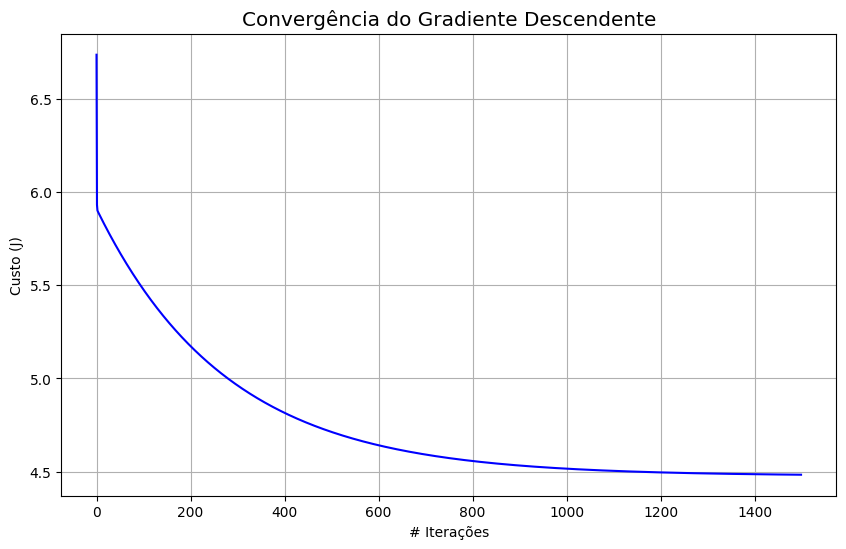

In [30]:
#definindo o tamanho da figura 
plt.figure(figsize=(10,6))

# plota os dados
plt.plot(J_historico, color='blue', linestyle='-', linewidth=1.5) 

# define os nomes do eixo x e do eixo y
plt.xlabel(r'# Iterações',fontsize='medium') 
plt.ylabel(r'Custo (J)',fontsize='medium') 

#define o título do gráfico
plt.title(r'Convergência do Gradiente Descendente', fontsize='x-large')

#acrescenta um grid no gráfico
plt.grid(axis='both')

plt.show()

Observe que o Custo ($J$) converge aproximadamente após 1.200 iterações e nunca aumenta com o decorrer das iterações. Se o Custo estiver aumentando, certamente o gradiente descendente não foi implementado corretamente.

Abaixo, são realizadas predições de resultados orçamentários para cidades com populações de 40.000 e 80.000 habitantes, respectivamente.

In [31]:
predict1 = np.dot( np.array([1, 4]),theta )
print('Para uma cidade com 40.000 habitantes, o resultado orçamentário previsto é de R$ %0.2f.\n' %(predict1*100000))

predict2 = np.dot( np.array([1, 8]),theta )
print('Para uma cidade com 80.000 habitantes, o resultado orçamentário previsto é de R$ %0.2f.\n' %(predict2*100000))

Para uma cidade com 40.000 habitantes, o resultado orçamentário previsto é de R$ 103515.80.

Para uma cidade com 80.000 habitantes, o resultado orçamentário previsto é de R$ 570060.74.



## Parte 3: Visualizando J($\theta_0$, $\theta_1$)

Primeiro, vamos plotar a superfície da função de custo ($J$).

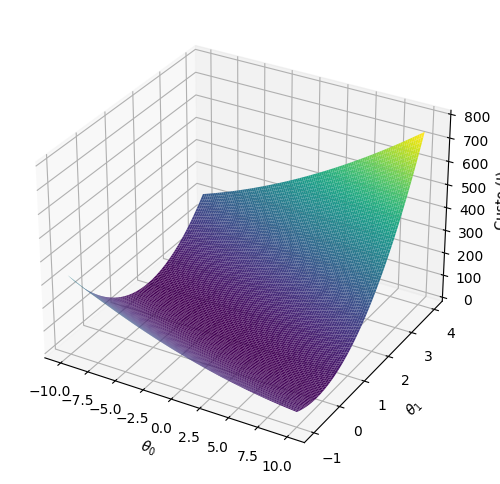

In [32]:
# Grade sobre a qual J sera calculado
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# cria um grid de valores a partir de theta0_vals e theta1_vals
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# calcula o custo J a partir dos valores de theta0_vals e theta1_vals
J_vals = np.array([computarCusto(X,Y,np.array([th0, th1])) for th0,th1 in zip(np.ravel(theta0_vals), np.ravel(theta1_vals))])
J_vals = J_vals.reshape(theta0_vals.shape)

# importa algumas biblioteca para plotar dados em 3D        
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from pylab import *

#cria uma figura para adicionar o gráfico
#fig = plt.figure(figsize=(10,6))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# plota a superfície
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=True, edgecolor='none')

# define o limite de valores mostrado no eixo z
ax.set_zlim(-1.01, 800)

# imprimi os labels dos rótulos x, y e z gráfico
ax.set_xlabel(r'$\theta_0$') 
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'Custo (J)')

# posição do gráfico
#ax.view_init(45, 90)

plt.show()

Em seguida, vamos plotar as curvas de nível para visualizar o ponto ótimo global encontrado ($\theta_0$, $\theta_1$) pelo gradiente descendente.

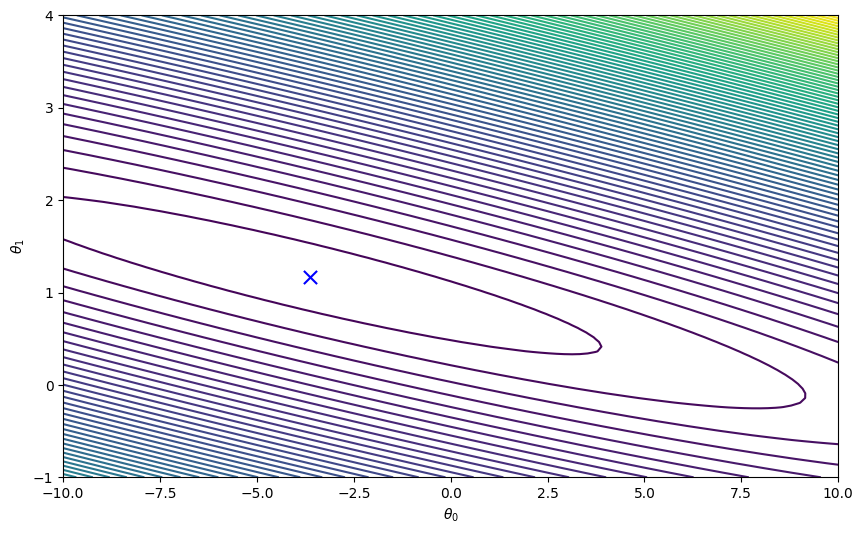

In [33]:
# importa algumas biblioteca para plotar dados em 3D        
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from pylab import *

#cria uma figura para adicionar o gráfico
fig = plt.figure(figsize=(10,6))

#plota as curvas de nível
plt.contour(theta0_vals, theta1_vals, J_vals, 80, cmap='viridis')

# define os nomes do eixo x e do eixo y
plt.xlabel(r'$\theta_0$',fontsize='medium') 
plt.ylabel(r'$\theta_1$',fontsize='medium') 

# plota os thetas otimos
plt.scatter(theta[0], theta[1], marker='x', color='blue', s=90)

plt.show()

## Parte 4: Predizendo o atributo-alvo ($y$) para novos dados ($x$)

Abaixo, você poderá realizar a predição para novos dados.

In [34]:
# Altere o valor abaixo para fazer a predição de novos dados. 
# Lembre-se que para uma cidade com 80.000 habitantes, popSize deverá ser igual a 8.
popSize = 8 # tamanho da população

# Realiza a predição
predict1 = np.dot( np.array([1, popSize]),theta ) 
print('Para uma cidade com %d habitantes, o resultado orcamentario previsto é de R$ %0.2f.\n' %(popSize*10000, predict1*100000))


Para uma cidade com 80000 habitantes, o resultado orcamentario previsto é de R$ 570060.74.

